# Métodos Agloremativos - Aplicações em Imagens

Com a função abaixo (sklearn), pode-se utilizar métodos aglomerativos em uma dada imagem. Métodos Aglomerativos são técnicas estatísticas utilizadas para detectar padrões em um dado conjunto de dados - podem-se utilizar tais métodos em carteiras de clientes, por exemplo.

In [37]:
def ClusterImg(image_path, resize, clusters = 2, linkage = 'ward'):
    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt
    from sklearn.feature_extraction.image import grid_to_graph
    from sklearn.cluster import AgglomerativeClustering
    from skimage import io
    import time
    
    #IMPORTAR O ARQUIVO EM ESCALA DE CINZA
    img = io.imread(image_path, as_grey=True)
    # Resize it to resize% of the original size to speed up the processing

    IMG = sp.misc.imresize(img, .9)
    # Create features
    X = np.reshape(IMG, (-1, 1))
    # Define the structure A of the data. Pixels connected to their neighbors.
    connectivity = grid_to_graph(*IMG.shape)
    # #############################################################################
    # Compute clustering
    print("Compute structured hierarchical clustering...")
    st = time.time()
    #n_clusters = 2  # number of regions
    ward = AgglomerativeClustering(n_clusters = clusters, linkage=linkage, connectivity=connectivity)
    ward.fit(X)
    label = np.reshape(ward.labels_, IMG.shape)
    print("Elapsed time: ", time.time() - st)
    print("Number of pixels: ", label.size)
    print("Number of clusters: ", np.unique(label).size)
    # #############################################################################

    # Plot the results on an image

    plt.figure(figsize=(8, 10))

    plt.imshow(IMG, cmap=plt.cm.gray)

    for l in range(clusters):

        plt.contour(label == l, contours=1, colors=[plt.cm.get_cmap("Spectral")(l / float(clusters)), ])

    plt.xticks(())

    plt.yticks(())

    plt.show()

Antes de utilizar o método em si, importaremos a figura (a foto do meu gato) a ser estudada no ambiente do python com o bloco a seguir:

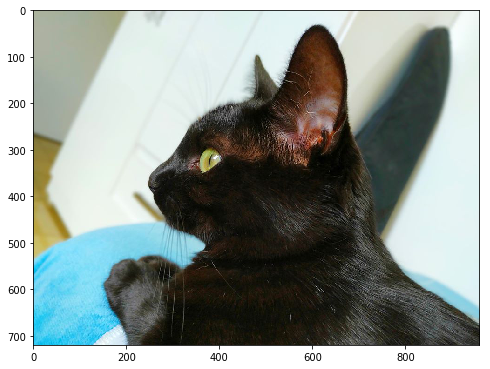

In [29]:
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline


img = io.imread('C:/Users/mathe/Pictures/foto1.jpg')

plt.figure(figsize=(8, 10))
plt.imshow(img)

C:\Users\mathe\Anaconda3\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')
C:\Users\mathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


Compute structured hierarchical clustering...
Elapsed time:  111.13421893119812
Number of pixels:  559872
Number of clusters:  5


C:\Users\mathe\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


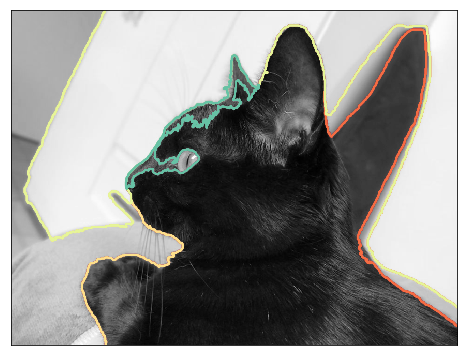

In [30]:
ClusterImg(image_path='C:/Users/mathe/Pictures/foto1.jpg', resize=.8, clusters=5)

A próxima figura, retirada do google com a pesquisa Rocket Launch hd, mostra o lançamento de um foguete

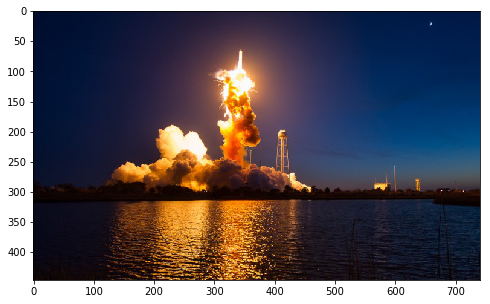

In [32]:
img = io.imread('C:/Users/mathe/Pictures/foto2.jpg')

plt.figure(figsize=(8, 10))
plt.imshow(img)

Utilizando a função anterior, iremos detectar padrões na imagem do foguete

C:\Users\mathe\Anaconda3\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')
C:\Users\mathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


Compute structured hierarchical clustering...
Elapsed time:  46.51298451423645
Number of pixels:  267066
Number of clusters:  5


C:\Users\mathe\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


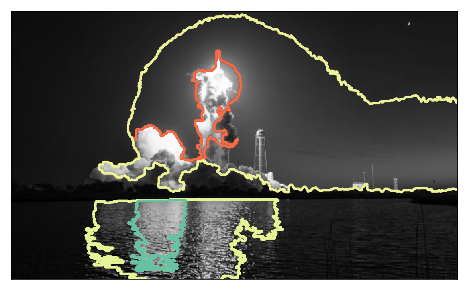

In [33]:
ClusterImg(image_path='C:/Users/mathe/Pictures/foto2.jpg', resize=.8, clusters=5)

A próxima figura mostrará a foto de irmãos gêmeos.

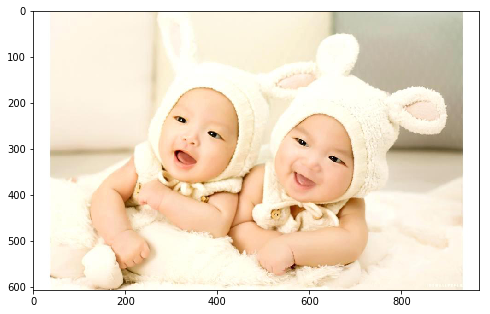

In [35]:
img = io.imread('C:/Users/mathe/Pictures/foto3.jpg')

plt.figure(figsize=(8, 10))
plt.imshow(img)

C:\Users\mathe\Anaconda3\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')
C:\Users\mathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


Compute structured hierarchical clustering...
Elapsed time:  94.57392621040344
Number of pixels:  475785
Number of clusters:  5


C:\Users\mathe\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


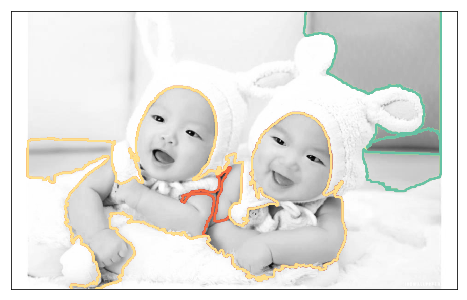

In [39]:
ClusterImg(image_path='C:/Users/mathe/Pictures/foto3.jpg', resize=.8, clusters=5)

# Explicações Gerais:

Os contornos nas figuras indicam os grupos/padrões detectados nas figuras utilizadas. As imagens foram colocadas em escala de cinza para tornar a utilização da fórmula "mais fácil". Em métodos agloromerativos, é preciso indicar o número de grupos a ser criado - bibliografia adicional: The elements of statistical learning

# Possíveis Aplicações de imagens no ramo de Machine Learning:

O processo anterior se resume às seguintes etapas: ler uma imagem (em escala de cinza), extrair os seus pixels e aplicar o método aglomerativo. Assumindo essas etapas como a base para manipulação de figuras no python, as mesmas podem ser utilizadas para alimentar um modelo ou algoritmo de machine learning. Podemos construir uma amostra de pixels para treinar um modelo capaz de diferenciar um sorriso em uma foto dada, por exemplo. 

Obs: O exemplo citado anteriormente não será feito nesse script, pois o meu computador não "aguenta" tal procedimento (rs)